In [6]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.linear_model import LinearRegression
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

In [7]:
train_df = pd.read_csv('./data/stsb-en-train.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)

In [8]:
train_df.head()

,sent1,sent2,score
0,A plane is taking off.,An air plane is taking off.,5.00
1,A man is playing a large flute.,A man is playing a flute.,3.80
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,3.80
3,Three men are playing chess.,Two men are playing chess.,2.60
4,A man is playing the cello.,A man seated is playing the cello.,4.25


In [9]:
val_df = pd.read_csv('./data/stsb-en-dev.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)

In [10]:
val_df.head()

,sent1,sent2,score
0,A man with a hard hat is dancing.,A man wearing a hard hat is dancing.,5.00
1,A young child is riding a horse.,A child is riding a horse.,4.75
2,A man is feeding a mouse to a snake.,The man is feeding a mouse to the snake.,5.00
3,A woman is playing the guitar.,A man is playing guitar.,2.40
4,A woman is playing the flute.,A man is playing a flute.,2.75


In [162]:
test_df = pd.read_csv('./data/stsb-en-test.csv', usecols=[0,1,2], names=['sent1', 'sent2', 'score'], header=None)

In [163]:
test_df.head()

,sent1,sent2,score
0,A girl is styling her hair.,A girl is brushing her hair.,2.5
1,A group of men play soccer on the beach.,A group of boys are playing soccer on the beach.,3.6
2,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.,5.0
3,A man is cutting up a cucumber.,A man is slicing a cucumber.,4.2
4,A man is playing a harp.,A man is playing a keyboard.,1.5


In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/AH00434/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
lemmatizer = WordNetLemmatizer()
ps = PorterStemmer()

In [15]:
def preprocess_text(text):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Replace numbers with num
    text = re.sub(r'\d+', '', text)
    # Lower case
    text= text.lower()
    sent_token = text.split()
    # Lemmatize
    sent_token = [lemmatizer.lemmatize(word) for word in sent_token]
    # Stemming
    sent_token = [ps.stem(word) for word in sent_token]
    return sent_token

In [16]:
train_df['sent1'] =train_df['sent1'].apply(lambda x: preprocess_text(x))
train_df['sent2'] =train_df['sent2'].apply(lambda x: preprocess_text(x))

In [17]:
val_df['sent1'] =val_df['sent1'].apply(lambda x: preprocess_text(x))
val_df['sent2'] =val_df['sent2'].apply(lambda x: preprocess_text(x))

In [164]:
test_df['sent1'] =test_df['sent1'].apply(lambda x: preprocess_text(x))
test_df['sent2'] =test_df['sent2'].apply(lambda x: preprocess_text(x))

In [19]:
train_df.head()

,sent1,sent2,score
0,"[a, plane, is, take, off]","[an, air, plane, is, take, off]",5.00
1,"[a, man, is, play, a, larg, flute]","[a, man, is, play, a, flute]",3.80
2,"[a, man, is, spread, shrede, chees, on, a, pizza]","[a, man, is, spread, shred, chees, on, an, unc...",3.80
3,"[three, men, are, play, chess]","[two, men, are, play, chess]",2.60
4,"[a, man, is, play, the, cello]","[a, man, seat, is, play, the, cello]",4.25


In [20]:
val_df.head()

,sent1,sent2,score
0,"[a, man, with, a, hard, hat, is, danc]","[a, man, wear, a, hard, hat, is, danc]",5.00
1,"[a, young, child, is, ride, a, hors]","[a, child, is, ride, a, hors]",4.75
2,"[a, man, is, feed, a, mous, to, a, snake]","[the, man, is, feed, a, mous, to, the, snake]",5.00
3,"[a, woman, is, play, the, guitar]","[a, man, is, play, guitar]",2.40
4,"[a, woman, is, play, the, flute]","[a, man, is, play, a, flute]",2.75


In [165]:
test_df.head()

,sent1,sent2,score
0,"[a, girl, is, style, her, hair]","[a, girl, is, brush, her, hair]",2.5
1,"[a, group, of, men, play, soccer, on, the, beach]","[a, group, of, boy, are, play, soccer, on, the...",3.6
2,"[one, woman, is, measur, anoth, woman, ankl]","[a, woman, measur, anoth, woman, ankl]",5.0
3,"[a, man, is, cut, up, a, cucumb]","[a, man, is, slice, a, cucumb]",4.2
4,"[a, man, is, play, a, harp]","[a, man, is, play, a, keyboard]",1.5


In [22]:
# Data Exploration

In [23]:
total_sents = list(train_df['sent1'])

In [24]:
total_sents.extend(list(train_df['sent2']))

In [25]:
len(total_sents)/2

5749.0

In [26]:
#sent_tokens = [sent.split() for sent in total_sents]

In [27]:
total_sents[0:5]

[['a', 'plane', 'is', 'take', 'off'],
 ['a', 'man', 'is', 'play', 'a', 'larg', 'flute'],
 ['a', 'man', 'is', 'spread', 'shrede', 'chees', 'on', 'a', 'pizza'],
 ['three', 'men', 'are', 'play', 'chess'],
 ['a', 'man', 'is', 'play', 'the', 'cello']]

In [28]:
word_dict = {}
for word_tokens in total_sents:
    for word in word_tokens:
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1

In [29]:
vocab_length = len(word_dict)

In [30]:
vocab_length

8306

In [31]:
uni_count = 0
for value in word_dict.values():
    if value == 1:
        uni_count += 1
print(uni_count)

2573


In [32]:
def get_sorted_counter(word_counter):
    return {k: v for k, v in sorted(word_counter.items(), key=lambda item: item[1], reverse=False)}

In [33]:
sorted_counter = get_sorted_counter(word_dict)

In [34]:
sent_dict = {}
for sent in total_sents:
    if len(sent) in sent_dict:
        sent_dict[len(sent)] += 1
    else:
        sent_dict[len(sent)] = 1

In [35]:
import matplotlib.pyplot as plt

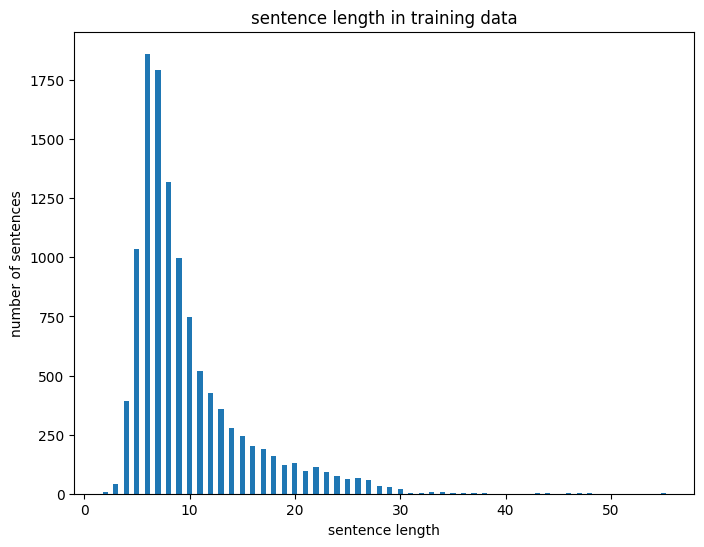

In [36]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(list(sent_dict.keys()), list(sent_dict.values()), width=0.5)
plt.title("sentence length in training data")
plt.xlabel("sentence length")
plt.ylabel("number of sentences")
plt.show()

Most of the data is concentrated at average length of 10 and maximum vector length can be treated as 35 with remaining ignored

In [37]:
#unknown words treatment

In [38]:
def unk_replace(word, word_dict):
    if word not in word_dict:
        return "unk"
    else:
        if word_dict[word] < 2:
            return "unk"
    return word

In [34]:
def remove_unk_duplicates(sent_token):
    new_list = []
    seen = set()

    for item in sent_token:
        if item not in seen:
            new_list.append(item)
            seen.add(item)
    return new_list

In [35]:
print(remove_unk_duplicates(["this", "unk", "again", "unk", "and"]))

['this', 'unk', 'again', 'and']


In [36]:
#train_df['sent1'] =train_df['sent1'].apply(lambda x: remove_unk_duplicates([unk_replace(word, word_dict) for word in x]))
#train_df['sent2'] =train_df['sent2'].apply(lambda x: remove_unk_duplicates([unk_replace(word, word_dict) for word in x]))

In [39]:
train_df['sent1'] =train_df['sent1'].apply(lambda x: [unk_replace(word, word_dict) for word in x])
train_df['sent2'] =train_df['sent2'].apply(lambda x: [unk_replace(word, word_dict) for word in x])

In [40]:
train_df.head()

,sent1,sent2,score
0,"[a, plane, is, take, off]","[an, air, plane, is, take, off]",5.00
1,"[a, man, is, play, a, larg, flute]","[a, man, is, play, a, flute]",3.80
2,"[a, man, is, spread, unk, chees, on, a, pizza]","[a, man, is, spread, shred, chees, on, an, unk...",3.80
3,"[three, men, are, play, chess]","[two, men, are, play, chess]",2.60
4,"[a, man, is, play, the, cello]","[a, man, seat, is, play, the, cello]",4.25


In [38]:
# val_df['sent1'] =val_df['sent1'].apply(lambda x: remove_unk_duplicates([unk_replace(word, word_dict) for word in x]))
# val_df['sent2'] =val_df['sent2'].apply(lambda x: remove_unk_duplicates([unk_replace(word, word_dict) for word in x]))

In [41]:
val_df['sent1'] =val_df['sent1'].apply(lambda x: [unk_replace(word, word_dict) for word in x])
val_df['sent2'] =val_df['sent2'].apply(lambda x: [unk_replace(word, word_dict) for word in x])

In [42]:
val_df.head()

,sent1,sent2,score
0,"[a, man, with, a, hard, hat, is, danc]","[a, man, wear, a, hard, hat, is, danc]",5.00
1,"[a, young, child, is, ride, a, hors]","[a, child, is, ride, a, hors]",4.75
2,"[a, man, is, feed, a, mous, to, a, snake]","[the, man, is, feed, a, mous, to, the, snake]",5.00
3,"[a, woman, is, play, the, guitar]","[a, man, is, play, guitar]",2.40
4,"[a, woman, is, play, the, flute]","[a, man, is, play, a, flute]",2.75


In [43]:
len(val_df)

1500

In [41]:
len(test_df)

1379

In [42]:
# test_df['sent1'] =test_df['sent1'].apply(lambda x: remove_unk_duplicates([unk_replace(word, word_dict) for word in x]))
# test_df['sent2'] =test_df['sent2'].apply(lambda x: remove_unk_duplicates([unk_replace(word, word_dict) for word in x]))

In [166]:
test_df['sent1'] =test_df['sent1'].apply(lambda x: [unk_replace(word, word_dict) for word in x])
test_df['sent2'] =test_df['sent2'].apply(lambda x: [unk_replace(word, word_dict) for word in x])

In [167]:
test_df.head()

,sent1,sent2,score
0,"[a, girl, is, style, her, hair]","[a, girl, is, brush, her, hair]",2.5
1,"[a, group, of, men, play, soccer, on, the, beach]","[a, group, of, boy, are, play, soccer, on, the...",3.6
2,"[one, woman, is, measur, anoth, woman, unk]","[a, woman, measur, anoth, woman, unk]",5.0
3,"[a, man, is, cut, up, a, cucumb]","[a, man, is, slice, a, cucumb]",4.2
4,"[a, man, is, play, a, harp]","[a, man, is, play, a, keyboard]",1.5


In [97]:
total_sents_unk = list(train_df['sent1'])

In [98]:
total_sents_unk.extend(list(train_df['sent2']))

In [99]:
len(total_sents_unk)

11498

In [100]:
sent_dict = {}
for sent in total_sents_unk:
    if len(sent) in sent_dict:
        sent_dict[len(sent)] += 1
    else:
        sent_dict[len(sent)] = 1

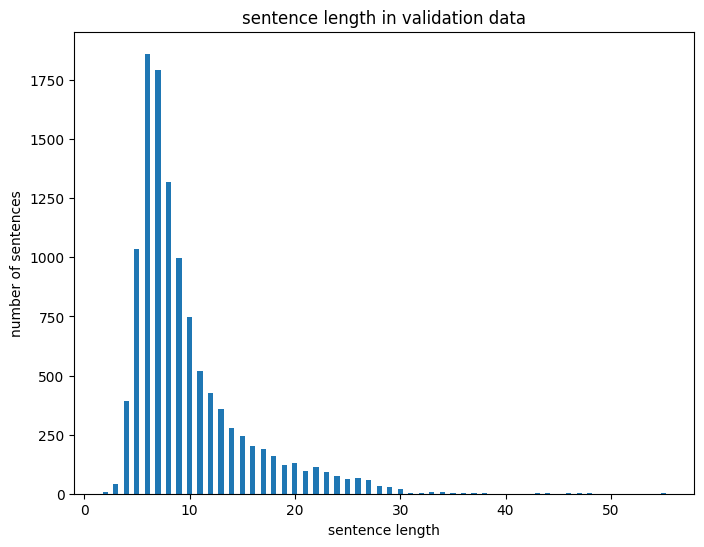

In [101]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(list(sent_dict.keys()), list(sent_dict.values()), width=0.5)
plt.title("sentence length in validation data")
plt.xlabel("sentence length")
plt.ylabel("number of sentences")
plt.show()

In [102]:
test_sents_unk = list(test_df['sent1'])
test_sents_unk.extend(list(test_df['sent2']))

In [103]:
len(test_sents_unk)

2758

In [104]:
sent_dict = {}
for sent in test_sents_unk:
    if len(sent) in sent_dict:
        sent_dict[len(sent)] += 1
    else:
        sent_dict[len(sent)] = 1

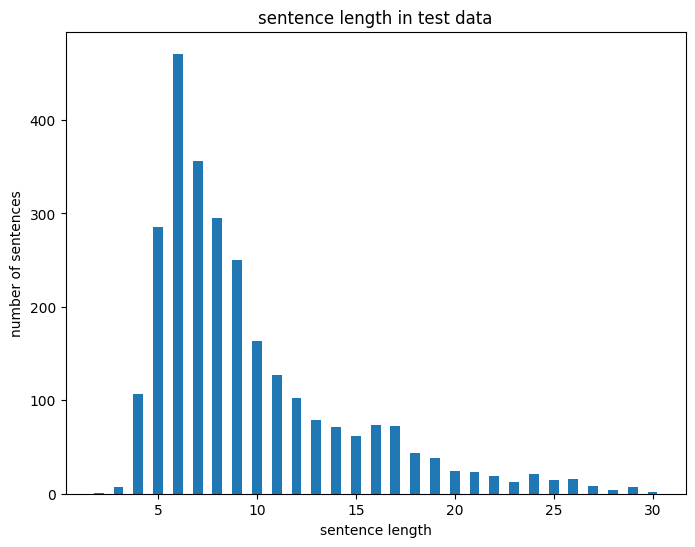

In [105]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(list(sent_dict.keys()), list(sent_dict.values()), width=0.5)
plt.title("sentence length in test data")
plt.xlabel("sentence length")
plt.ylabel("number of sentences")
plt.show()

window size of 30 or less than 30 should be good as test data maximum length of a sentence is less than 30

## Doc2vec

In [673]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from scipy import spatial

In [674]:
max_length = max(len(sentence) for sentence in total_sents_unk)
max_length

55

In [675]:
documents = []
for idx, sent in enumerate(total_sents_unk):
    documents.append(TaggedDocument(sent, [idx]))

In [676]:
documents[0:5]

[TaggedDocument(words=['a', 'plane', 'is', 'take', 'off'], tags=[0]),
 TaggedDocument(words=['a', 'man', 'is', 'play', 'a', 'larg', 'flute'], tags=[1]),
 TaggedDocument(words=['a', 'man', 'is', 'spread', 'unk', 'chees', 'on', 'a', 'pizza'], tags=[2]),
 TaggedDocument(words=['three', 'men', 'are', 'play', 'chess'], tags=[3]),
 TaggedDocument(words=['a', 'man', 'is', 'play', 'the', 'cello'], tags=[4])]

In [677]:
model = Doc2Vec(documents, vector_size=25, window=6, min_count=1, workers=1, epochs=30, alpha=0.1, min_alpha=0.001, hs=1)

In [58]:
# Save the trained model to disk
#model.save('doc2vec_model_v2')

In [678]:
# Generate sentence embeddings
embedding1 = model.infer_vector(train_df['sent1'][0])
embedding2 = model.infer_vector(train_df['sent2'][0])

# Compare the sentence embeddings using cosine similarity
similarity = 1 - spatial.distance.cosine(embedding1, embedding2)

In [679]:
similarity

0.6801850199699402

In [61]:
embedding3 = model.infer_vector(train_df['sent1'][2])
embedding4 = model.infer_vector(train_df['sent2'][10])

In [62]:
embedding3, embedding4

(array([-8.0915838e-02, -1.0833093e+00,  6.0414439e-01,  1.9638455e+00,
        -1.6661834e+00,  3.8131821e+00, -4.6188602e-01, -2.4877295e-01,
         1.9771025e+00, -2.0853195e+00, -8.5337740e-01,  1.0217502e-03,
        -9.2315400e-01,  9.7201484e-01,  9.9504650e-01, -3.9682744e+00,
         3.5881557e+00,  9.5258820e-01, -4.9740701e+00,  2.1842620e+00,
        -2.8973780e+00,  1.3737338e+00,  1.3988059e+00,  2.1888065e+00,
         1.6883426e+00], dtype=float32),
 array([-0.4901308 ,  2.0428216 , -0.68654245, -2.9100327 ,  0.93798524,
         1.3150048 ,  3.1189334 , -1.3435798 , -0.75977653, -1.5132685 ,
         1.0512435 , -3.3015475 ,  2.1349633 , -0.56637144, -1.7201209 ,
        -2.8504884 ,  1.2101007 ,  1.3310815 ,  0.37616768,  1.6179612 ,
         1.099     , -0.7110876 ,  2.7955775 ,  0.10225153, -1.8639121 ],
       dtype=float32))

In [68]:
def sts_score(sim_score):
    sts_score = (sim_score+1) * 2.5
    return sts_score

In [64]:
model.random.seed(42)
train_df['sent1_embedding'] = train_df['sent1'].apply(lambda x: model.infer_vector(x))
train_df['sent2_embedding'] = train_df['sent2'].apply(lambda x: model.infer_vector(x))

In [65]:
train_df['y_pred'] = train_df.apply(lambda x: sts_score(1 - spatial.distance.cosine(x['sent1_embedding'], x['sent2_embedding'])), axis=1)

In [66]:
train_df.head()

,sent1,sent2,score,sent1_embedding,sent2_embedding,y_pred
0,"[a, plane, is, take, off]","[an, air, plane, is, take, off]",5.00,"[0.9864692, -2.2660522, -0.103576, 1.8129503, ...","[1.9118893, -1.3158773, -1.7765663, 0.02113962...",4.027509
1,"[a, man, is, play, larg, flute]","[a, man, is, play, flute]",3.80,"[1.1726476, 0.38243365, -0.5652934, -0.4561446...","[0.14111541, -0.3001792, -0.12395583, -0.86583...",4.528369
2,"[a, man, is, spread, unk, chees, on, pizza]","[a, man, is, spread, shred, chees, on, an, unk...",3.80,"[0.5748898, -0.4868232, 0.17118314, 2.1087997,...","[-0.5277458, -0.26175153, 0.7717957, -1.980574...",3.994909
3,"[three, men, are, play, chess]","[two, men, are, play, chess]",2.60,"[0.020137124, 2.0637279, 2.0419598, -1.0271838...","[-0.4934113, 1.4713883, 1.207358, -1.4035007, ...",4.571979
4,"[a, man, is, play, the, cello]","[a, man, seat, is, play, the, cello]",4.25,"[0.6147697, 0.58741856, 1.5382065, 1.5268751, ...","[-0.53330123, 0.8698681, 1.9762219, 0.7713875,...",4.333014


In [67]:
y_pred = train_df['y_pred']

In [68]:
y_train = train_df['score']

In [70]:
from scipy.stats import pearsonr
def pearson_corr(y_true, y_pred):
    """
    Calculate Pearson correlation coefficient between two arrays.
    """
    corr, _ = pearsonr(y_true, y_pred)
    return corr

In [70]:
# Calculate Pearson correlation coefficient between predicted values and target values
corr = pearson_corr(y_train, y_pred)

# Print the correlation coefficient
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.53


In [71]:
model.random.seed(42)
val_df['sent1_embedding'] = val_df['sent1'].apply(lambda x: model.infer_vector(x))
val_df['sent2_embedding'] = val_df['sent2'].apply(lambda x: model.infer_vector(x))

In [72]:
val_df['y_pred'] = val_df.apply(lambda x: sts_score(1 - spatial.distance.cosine(x['sent1_embedding'], x['sent2_embedding'])), axis=1)

In [73]:
val_df.head()

,sent1,sent2,score,sent1_embedding,sent2_embedding,y_pred
0,"[a, man, with, hard, hat, is, danc]","[a, man, wear, hard, hat, is, danc]",5.00,"[0.2228367, 0.15842247, 0.5859811, 0.07883484,...","[0.9674377, -0.9272134, -1.285685, 0.6397102, ...",4.693286
1,"[a, young, child, is, ride, hors]","[a, child, is, ride, hors]",4.75,"[-2.4442246, 1.0514715, -0.23553203, -1.665722...","[-1.0548029, 1.4017025, 1.0543997, -0.1567127,...",4.437892
2,"[a, man, is, feed, mous, to, snake]","[the, man, is, feed, a, mous, to, snake]",5.00,"[-2.4976134, -1.3845634, -0.6395363, 3.0044372...","[-3.3567224, -1.3375549, -0.6844515, 3.0857813...",4.984047
3,"[a, woman, is, play, the, guitar]","[a, man, is, play, guitar]",2.40,"[-0.36892942, 0.043651797, 0.9727363, -1.04533...","[-1.0463748, 0.30364293, 0.78331405, -0.395375...",4.584932
4,"[a, woman, is, play, the, flute]","[a, man, is, play, flute]",2.75,"[0.77743274, -0.46335158, -0.4947413, -1.32314...","[0.26047373, -0.044908065, -0.23048759, -0.812...",4.705092


In [74]:
y_pred = val_df['y_pred']

In [75]:
y_val = val_df['score']

In [76]:
# Calculate Pearson correlation coefficient between predicted values and target values
corr = pearson_corr(y_val, y_pred)

# Print the correlation coefficient
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.59


In [77]:
model.random.seed(42)
test_df['sent1_embedding'] = test_df['sent1'].apply(lambda x: model.infer_vector(x))
test_df['sent2_embedding'] = test_df['sent2'].apply(lambda x: model.infer_vector(x))

In [78]:
test_df['y_pred'] = test_df.apply(lambda x: sts_score(1 - spatial.distance.cosine(x['sent1_embedding'], x['sent2_embedding'])), axis=1)

In [79]:
test_df.head()

,sent1,sent2,score,sent1_embedding,sent2_embedding,y_pred
0,"[a, girl, is, style, her, hair]","[a, girl, is, brush, her, hair]",2.5,"[-0.6746696, 3.0577161, 6.09757, -2.235744, -2...","[0.14125915, 0.7944734, 3.9252, -2.421765, -2....",3.982087
1,"[a, group, of, men, play, soccer, on, the, beach]","[a, group, of, boy, are, play, soccer, on, the...",3.6,"[0.7344324, -1.6498055, -1.7304202, -5.4861097...","[1.1423165, -2.6406758, -1.2685233, -2.7700768...",3.882190
2,"[one, woman, is, measur, anoth, unk]","[a, woman, measur, anoth, unk]",5.0,"[-2.7164004, -4.107922, -2.609709, -5.0236754,...","[-1.7379254, -4.0445743, -2.0853796, -5.220481...",4.799586
3,"[a, man, is, cut, up, cucumb]","[a, man, is, slice, cucumb]",4.2,"[-1.9431009, -0.7188035, 0.6113643, 0.08932299...","[0.8139604, -0.6387818, -0.10482016, 0.9009722...",3.492135
4,"[a, man, is, play, harp]","[a, man, is, play, keyboard]",1.5,"[0.3037535, -0.4267695, 0.09114389, -0.1471065...","[-1.5110046, 1.2255467, 1.8177335, 0.11791366,...",3.299985


In [80]:
y_pred = test_df['y_pred']

In [81]:
y_test = test_df['score']

In [82]:
# Calculate Pearson correlation coefficient between predicted values and target values
corr = pearson_corr(y_test, y_pred)

# Print the correlation coefficient
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.53


In [83]:
max_len = lambda row: max(len(row['sent1']), len(row['sent2']))

In [84]:
train_df['sent_len'] = train_df.apply(max_len, axis=1)

In [85]:
train_df['diff'] = abs(train_df['score'] - train_df['y_pred'])

In [86]:
train_df.head()

,sent1,sent2,score,sent1_embedding,sent2_embedding,y_pred,sent_len,diff
0,"[a, plane, is, take, off]","[an, air, plane, is, take, off]",5.00,"[0.9864692, -2.2660522, -0.103576, 1.8129503, ...","[1.9118893, -1.3158773, -1.7765663, 0.02113962...",4.027509,6,0.972491
1,"[a, man, is, play, larg, flute]","[a, man, is, play, flute]",3.80,"[1.1726476, 0.38243365, -0.5652934, -0.4561446...","[0.14111541, -0.3001792, -0.12395583, -0.86583...",4.528369,6,0.728369
2,"[a, man, is, spread, unk, chees, on, pizza]","[a, man, is, spread, shred, chees, on, an, unk...",3.80,"[0.5748898, -0.4868232, 0.17118314, 2.1087997,...","[-0.5277458, -0.26175153, 0.7717957, -1.980574...",3.994909,10,0.194909
3,"[three, men, are, play, chess]","[two, men, are, play, chess]",2.60,"[0.020137124, 2.0637279, 2.0419598, -1.0271838...","[-0.4934113, 1.4713883, 1.207358, -1.4035007, ...",4.571979,5,1.971979
4,"[a, man, is, play, the, cello]","[a, man, seat, is, play, the, cello]",4.25,"[0.6147697, 0.58741856, 1.5382065, 1.5268751, ...","[-0.53330123, 0.8698681, 1.9762219, 0.7713875,...",4.333014,7,0.083014


In [87]:
grouped_df = train_df.groupby(['sent_len']).mean()

/var/folders/gb/8lc9v2sx5mq19kgysgv67bzw0000gn/T/ipykernel_95229/1448148412.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = train_df.groupby(['sent_len']).mean()


In [88]:
grouped_df['sent_length'] = grouped_df.index

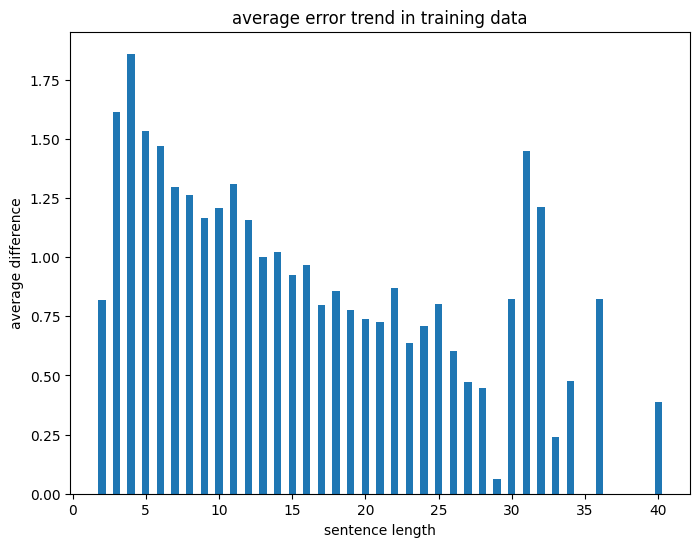

In [89]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(list(grouped_df.index), list(grouped_df['diff']), width=0.5)
plt.title("average error trend in training data")
plt.xlabel("sentence length")
plt.ylabel("average difference")
plt.show()

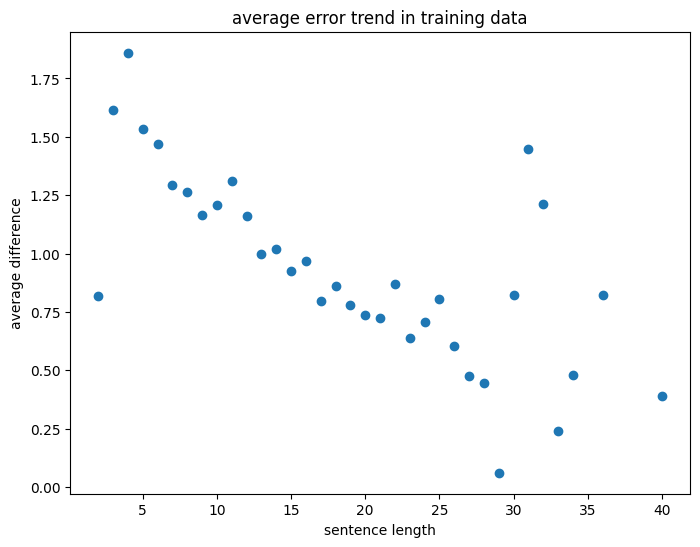

In [90]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(list(grouped_df.index), list(grouped_df['diff']))
plt.title("average error trend in training data")
plt.xlabel("sentence length")
plt.ylabel("average difference")
plt.show()

From this it can be observed the highest residual is observed for sentences having length in range of 4-7 and for range 30 - 32

<br>Lets see the residual trend in validation data

In [91]:
val_df['sent_len'] = val_df.apply(max_len, axis=1)

In [92]:
val_df['diff'] = abs(val_df['score'] - val_df['y_pred'])

In [93]:
grouped_val = val_df.groupby(['sent_len']).mean()

/var/folders/gb/8lc9v2sx5mq19kgysgv67bzw0000gn/T/ipykernel_95229/640488790.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_val = val_df.groupby(['sent_len']).mean()


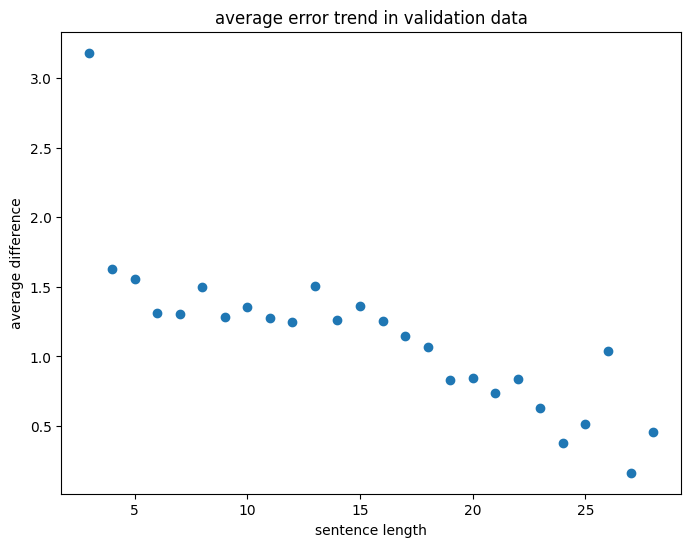

In [94]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(list(grouped_val.index), list(grouped_val['diff']))
plt.title("average error trend in validation data")
plt.xlabel("sentence length")
plt.ylabel("average difference")
plt.show()

Analysis:<br>
    The trend is similar to what we observe in training as the model is performing bad for sentences less than length 5 and in validation data there is no sentence with length in range of 30-32.

In [95]:
test_df['sent_len'] = test_df.apply(max_len, axis=1)

In [96]:
test_df['diff'] = abs(test_df['score'] - test_df['y_pred'])

In [97]:
len(train_df)

5749

In [98]:
train_df.to_pickle("./sem_train_df.pkl")  

In [99]:
val_df.to_pickle("./sem_val_df.pkl")  

In [100]:
test_df.to_pickle("./sem_test_df.pkl")  

# Bert Embeddings

In [139]:
#!pip install -U sentence-transformers

In [2]:
from sentence_transformers import SentenceTransformer

model1 = SentenceTransformer('distilbert-base-nli-mean-tokens')


In [140]:
model = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [141]:
train_embeddings1 = list(train_df['sent1'])
train_embeddings2 = list(train_df['sent2'])

In [142]:
train_embeddings1 = [" ".join(i for i in j) for j in train_embeddings1]
train_embeddings2 = [" ".join(i for i in j) for j in train_embeddings2]

In [143]:
train_embeddings1 = model.encode(train_embeddings1)
train_embeddings2 = model.encode(train_embeddings2)

In [144]:
train_embeddings1.shape, train_embeddings2.shape

((5749, 768), (5749, 768))

In [145]:
train_df.head()

,sent1,sent2,score
0,"[a, plane, is, take, off]","[an, air, plane, is, take, off]",5.00
1,"[a, man, is, play, a, larg, flute]","[a, man, is, play, a, flute]",3.80
2,"[a, man, is, spread, unk, chees, on, a, pizza]","[a, man, is, spread, shred, chees, on, an, unk...",3.80
3,"[three, men, are, play, chess]","[two, men, are, play, chess]",2.60
4,"[a, man, is, play, the, cello]","[a, man, seat, is, play, the, cello]",4.25


In [146]:
y_train = list(train_df["score"])

In [147]:
def get_sts_scores(emb1_lt, emb2_lt):
    y_pred = []
    for i in range(len(emb1_lt)):
        sim_score = 1 - spatial.distance.cosine(emb1_lt[i], emb2_lt[i])
        y_pred.append(sts_score(sim_score))
    return y_pred
    

In [148]:
y_pred = get_sts_scores(train_embeddings1, train_embeddings2)

In [149]:
# Calculate Pearson correlation coefficient between predicted values and target values
corr = pearson_corr(y_train, y_pred)

# Print the correlation coefficient
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.87


In [150]:
val_embeddings1 = list(val_df['sent1'])
val_embeddings2 = list(val_df['sent2'])

In [151]:
val_embeddings1 = [" ".join(i for i in j) for j in val_embeddings1]
val_embeddings2 = [" ".join(i for i in j) for j in val_embeddings2]

In [152]:
val_embeddings1 = model.encode(val_embeddings1)
val_embeddings2 = model.encode(val_embeddings2)

In [153]:
val_embeddings1.shape

(1500, 768)

In [154]:
y_val = list(val_df["score"])

In [155]:
y_pred = get_sts_scores(val_embeddings1, val_embeddings2)

In [156]:
# Calculate Pearson correlation coefficient between predicted values and target values
corr = pearson_corr(y_val, y_pred)

# Print the correlation coefficient
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.79


In [178]:
test_embeddings1 = list(test_df['sent1'])
test_embeddings2 = list(test_df['sent2'])

In [179]:
test_embeddings1 = [" ".join(i for i in j) for j in test_embeddings1]
test_embeddings2 = [" ".join(i for i in j) for j in test_embeddings2]

In [180]:
test_embeddings1 = model.encode(test_embeddings1)
test_embeddings2 = model.encode(test_embeddings2)

In [181]:
test_embeddings1.shape

(1379, 768)

In [172]:
y_test = list(test_df["score"])

In [173]:
y_pred = get_sts_scores(test_embeddings1, test_embeddings2)

In [174]:
# Calculate Pearson correlation coefficient between predicted values and target values
corr = pearson_corr(y_test, y_pred)

# Print the correlation coefficient
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.76


In [182]:
test_df1 = pd.DataFrame({'embeddings1': test_embeddings1.tolist(), 'embeddings2': test_embeddings2.tolist(), "score": y_test})

In [183]:
test_df1.head()

,embeddings1,embeddings2,score
0,"[0.451200008392334, -0.4769255220890045, 0.861...","[-0.04254027456045151, -0.6977147459983826, 0....",2.5
1,"[-0.30514276027679443, 0.3496732711791992, -0....","[-0.7919032573699951, 0.23557151854038239, -0....",3.6
2,"[-0.46835681796073914, -0.8171507120132446, 0....","[-0.41532206535339355, -0.7629479765892029, 0....",5.0
3,"[-0.47668102383613586, -0.43490707874298096, 0...","[-0.6571442484855652, -0.142209991812706, 0.26...",4.2
4,"[-0.09667470306158066, 0.5099226832389832, 0.2...","[-2.442096471786499, -0.06356014311313629, -0....",1.5


In [184]:
val_df1 = pd.DataFrame({'embeddings1': val_embeddings1.tolist(), 'embeddings2': val_embeddings2.tolist(), "score": y_val})

In [185]:
val_df1.head()

,embeddings1,embeddings2,score
0,"[0.20792917907238007, 0.13251976668834686, 0.4...","[0.2854107618331909, 0.2590910792350769, 0.335...",5.00
1,"[-1.5553518533706665, -0.42551881074905396, 0....","[-1.5163092613220215, -0.37845131754875183, 0....",4.75
2,"[0.15974768996238708, 0.08551517128944397, -0....","[0.15975721180438995, 0.18069933354854584, 0.0...",5.00
3,"[-0.285798043012619, -0.44078198075294495, 0.0...","[-0.4740341603755951, -0.6429125070571899, -0....",2.40
4,"[-0.6685930490493774, -0.01734122633934021, 0....","[-0.9917641878128052, -0.1497594267129898, 0.1...",2.75


In [186]:
train_df1 = pd.DataFrame({'embeddings1': train_embeddings1.tolist(), 'embeddings2': train_embeddings2.tolist(), "score": y_train})

In [187]:
train_df1.head()

,embeddings1,embeddings2,score
0,"[-0.32456499338150024, -0.2800503671169281, -0...","[-0.12816667556762695, -0.21412794291973114, -...",5.00
1,"[-1.1280590295791626, -0.12280690670013428, 0....","[-0.9917641878128052, -0.1497594267129898, 0.1...",3.80
2,"[0.1862933337688446, -0.29718098044395447, 0.0...","[0.5862688422203064, -0.75014328956604, -0.402...",3.80
3,"[-0.5876632928848267, 0.052793391048908234, -0...","[-0.5204267501831055, -0.05645241215825081, -0...",2.60
4,"[-1.5430655479431152, -0.055979542434215546, 0...","[-1.4934371709823608, 0.09630199521780014, 0.0...",4.25


In [188]:
train_df1.to_pickle("./sem_train_df1.pkl")  
val_df1.to_pickle("./sem_val_df1.pkl")  
test_df1.to_pickle("./sem_test_df1.pkl")  

# Fine Tuning - To Do

Step1: Explore other text representations <br>
Step2: Explore model training like SVM, Bidirectonal LSTM

# Cross Sentence Similiarity - To Do

In [101]:
train_df = pd.read_pickle("./sem_train_df.pkl") 
train_df.head()

,sent1,sent2,score,sent1_embedding,sent2_embedding,y_pred,sent_len,diff
0,"[a, plane, is, take, off]","[an, air, plane, is, take, off]",5.00,"[0.9864692, -2.2660522, -0.103576, 1.8129503, ...","[1.9118893, -1.3158773, -1.7765663, 0.02113962...",4.027509,6,0.972491
1,"[a, man, is, play, larg, flute]","[a, man, is, play, flute]",3.80,"[1.1726476, 0.38243365, -0.5652934, -0.4561446...","[0.14111541, -0.3001792, -0.12395583, -0.86583...",4.528369,6,0.728369
2,"[a, man, is, spread, unk, chees, on, pizza]","[a, man, is, spread, shred, chees, on, an, unk...",3.80,"[0.5748898, -0.4868232, 0.17118314, 2.1087997,...","[-0.5277458, -0.26175153, 0.7717957, -1.980574...",3.994909,10,0.194909
3,"[three, men, are, play, chess]","[two, men, are, play, chess]",2.60,"[0.020137124, 2.0637279, 2.0419598, -1.0271838...","[-0.4934113, 1.4713883, 1.207358, -1.4035007, ...",4.571979,5,1.971979
4,"[a, man, is, play, the, cello]","[a, man, seat, is, play, the, cello]",4.25,"[0.6147697, 0.58741856, 1.5382065, 1.5268751, ...","[-0.53330123, 0.8698681, 1.9762219, 0.7713875,...",4.333014,7,0.083014


In [102]:
val_df = pd.read_pickle("./sem_val_df.pkl") 
val_df.head()

,sent1,sent2,score,sent1_embedding,sent2_embedding,y_pred,sent_len,diff
0,"[a, man, with, hard, hat, is, danc]","[a, man, wear, hard, hat, is, danc]",5.00,"[0.2228367, 0.15842247, 0.5859811, 0.07883484,...","[0.9674377, -0.9272134, -1.285685, 0.6397102, ...",4.693286,7,0.306714
1,"[a, young, child, is, ride, hors]","[a, child, is, ride, hors]",4.75,"[-2.4442246, 1.0514715, -0.23553203, -1.665722...","[-1.0548029, 1.4017025, 1.0543997, -0.1567127,...",4.437892,6,0.312108
2,"[a, man, is, feed, mous, to, snake]","[the, man, is, feed, a, mous, to, snake]",5.00,"[-2.4976134, -1.3845634, -0.6395363, 3.0044372...","[-3.3567224, -1.3375549, -0.6844515, 3.0857813...",4.984047,8,0.015953
3,"[a, woman, is, play, the, guitar]","[a, man, is, play, guitar]",2.40,"[-0.36892942, 0.043651797, 0.9727363, -1.04533...","[-1.0463748, 0.30364293, 0.78331405, -0.395375...",4.584932,6,2.184932
4,"[a, woman, is, play, the, flute]","[a, man, is, play, flute]",2.75,"[0.77743274, -0.46335158, -0.4947413, -1.32314...","[0.26047373, -0.044908065, -0.23048759, -0.812...",4.705092,6,1.955092


In [103]:
test_df = pd.read_pickle("./sem_test_df.pkl") 
test_df.head()

,sent1,sent2,score,sent1_embedding,sent2_embedding,y_pred,sent_len,diff
0,"[a, girl, is, style, her, hair]","[a, girl, is, brush, her, hair]",2.5,"[-0.6746696, 3.0577161, 6.09757, -2.235744, -2...","[0.14125915, 0.7944734, 3.9252, -2.421765, -2....",3.982087,6,1.482087
1,"[a, group, of, men, play, soccer, on, the, beach]","[a, group, of, boy, are, play, soccer, on, the...",3.6,"[0.7344324, -1.6498055, -1.7304202, -5.4861097...","[1.1423165, -2.6406758, -1.2685233, -2.7700768...",3.882190,10,0.282190
2,"[one, woman, is, measur, anoth, unk]","[a, woman, measur, anoth, unk]",5.0,"[-2.7164004, -4.107922, -2.609709, -5.0236754,...","[-1.7379254, -4.0445743, -2.0853796, -5.220481...",4.799586,6,0.200414
3,"[a, man, is, cut, up, cucumb]","[a, man, is, slice, cucumb]",4.2,"[-1.9431009, -0.7188035, 0.6113643, 0.08932299...","[0.8139604, -0.6387818, -0.10482016, 0.9009722...",3.492135,6,0.707865
4,"[a, man, is, play, harp]","[a, man, is, play, keyboard]",1.5,"[0.3037535, -0.4267695, 0.09114389, -0.1471065...","[-1.5110046, 1.2255467, 1.8177335, 0.11791366,...",3.299985,5,1.799985


In [70]:
embeddings1 = list(train_df['sent1_embedding'])
embeddings2 = list(train_df['sent2_embedding'])

In [71]:
scores = list(train_df['score'])

In [72]:
import torch
import torch.nn as nn
import torch.optim as optim
# Convert the data into PyTorch tensors
embeddings1 = torch.tensor(embeddings1, dtype=torch.float)
embeddings2 = torch.tensor(embeddings2, dtype=torch.float)
scores = torch.tensor(scores, dtype=torch.float)

/Users/AH00434/opt/anaconda3/envs/nlp_venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [73]:
# Split the data into training and validation sets
train_size = int(0.8 * len(embeddings1))
train_embeddings1 = embeddings1[:train_size]
train_embeddings2 = embeddings2[:train_size]
train_scores = scores[:train_size]
val_embeddings1 = embeddings1[train_size:]
val_embeddings2 = embeddings2[train_size:]
val_scores = scores[train_size:]# Split the data into training and validation sets
train_size = int(0.8 * len(embeddings1))
train_embeddings1 = embeddings1[:train_size]
train_embeddings2 = embeddings2[:train_size]
train_scores = scores[:train_size]
val_embeddings1 = embeddings1[train_size:]
val_embeddings2 = embeddings2[train_size:]
val_scores = scores[train_size:]

In [77]:
# Define the hyperparameters
input_dim = 25 # The dimension of the sentence embeddings
hidden_dim = 50
lr = 0.001
num_epochs = 10
batch_size = 10

In [1]:
# non optimized

In [79]:
class SentenceSimilarityModel(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, 1)

    def forward(self, x1, x2):
        x = torch.cat((x1, x2), dim=1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x



In [80]:
# Create the model and optimizer
model = SentenceSimilarityModel(input_dim*2, hidden_dim)
optimizer = optim.Adam(model.parameters(), lr=lr)

# Define the loss function
loss_fn = nn.MSELoss()

In [80]:
# Train the model
for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(train_embeddings1), batch_size):
        batch_embeddings1 = train_embeddings1[i:i+batch_size]
        batch_embeddings2 = train_embeddings2[i:i+batch_size]
        batch_scores = train_scores[i:i+batch_size]
        optimizer.zero_grad()
        output = model(batch_embeddings1, batch_embeddings2)
        loss = loss_fn(output.squeeze(), batch_scores)
        loss.backward()
        optimizer.step()

    # Evaluate the model on the validation set
    model.eval()
    with torch.no_grad():
        val_output = model(val_embeddings1, val_embeddings2)
        val_loss = loss_fn(val_output.squeeze(), val_scores)
        print('Epoch {} - Training Loss: {:.4f}, Validation Loss: {:.4f}'.format(epoch+1, loss.item(), val_loss.item()))

Epoch 1 - Training Loss: 3.3538, Validation Loss: 2.5424
Epoch 2 - Training Loss: 3.1834, Validation Loss: 2.4551
Epoch 3 - Training Loss: 3.0226, Validation Loss: 2.3879
Epoch 4 - Training Loss: 2.9248, Validation Loss: 2.3507
Epoch 5 - Training Loss: 2.8991, Validation Loss: 2.3376
Epoch 6 - Training Loss: 2.8425, Validation Loss: 2.3380
Epoch 7 - Training Loss: 2.7846, Validation Loss: 2.3403
Epoch 8 - Training Loss: 2.7930, Validation Loss: 2.3455
Epoch 9 - Training Loss: 2.7358, Validation Loss: 2.3511
Epoch 10 - Training Loss: 2.7588, Validation Loss: 2.3619


In [2]:
# Optimized

In [74]:
import torch.utils.data as data

# Define a custom dataset class
class SentenceSimilarityDataset(data.Dataset):
    def __init__(self, embeddings1, embeddings2, scores):
        self.embeddings1 = embeddings1
        self.embeddings2 = embeddings2
        self.scores = scores

    def __len__(self):
        return len(self.embeddings1)

    def __getitem__(self, index):
        return self.embeddings1[index], self.embeddings2[index], self.scores[index]

# Create the dataset
dataset = SentenceSimilarityDataset(embeddings1, embeddings2, scores)

In [75]:
# Define the batch size
batch_size = 10

# Create the DataLoader
dataloader = data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# Train the model
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch in dataloader:
        optimizer.zero_grad()
        embeddings1_batch, embeddings2_batch, scores_batch = batch
        output = model(embeddings1_batch, embeddings2_batch)
        loss = loss_fn(output.squeeze(), scores_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * len(embeddings1_batch)
    train_loss /= len(train_embeddings1)

    # Evaluate the model on the validation set
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in val_dataloader:
            embeddings1_batch, embeddings2_batch, scores_batch = batch
            val_output = model(embeddings1_batch, embeddings2_batch)
            val_loss += loss_fn(val_output.squeeze(), scores_batch).item() * len(embeddings1_batch)
        val_loss /= len(val_embeddings1)

    print('Epoch {} - Training Loss: {:.4f}, Validation Loss: {:.4f}'.format(epoch+1, train_loss, val_loss))

# SVM training

In [104]:
train_embeddings1 = list(train_df['sent1_embedding'])
train_embeddings2 = list(train_df['sent2_embedding'])
train_scores = list(train_df['score'])
val_embeddings1 = list(val_df['sent1_embedding'])
val_embeddings2 = list(val_df['sent1_embedding'])
val_scores = list(val_df['score'])

In [105]:
# Convert the data into numpy arrays
X_train = np.concatenate((train_embeddings1, train_embeddings2), axis=1)
y_train = np.array(train_scores)

In [106]:
X_val = np.concatenate((val_embeddings1, val_embeddings2), axis=1)
y_val = np.array(val_scores)

In [107]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [133]:
# Create the SVR model and fit it to the training data
svr = SVR(kernel='rbf', C=5, epsilon=0.2)
svr.fit(X_train, y_train)

SVR(C=5, epsilon=0.2)

In [134]:
# Make predictions on the validation set
y_pred = svr.predict(X_val)

In [135]:
# Calculate the mean squared error on the validation set
mse = mean_squared_error(y_val, y_pred)
print('Validation MSE:', mse)

Validation MSE: 3.6851091757920864


In [136]:
y_pred

array([3.6854945 , 3.89621259, 3.28625368, ..., 3.52402129, 3.96117166,
       3.93734823])

In [137]:
# Calculate Pearson correlation coefficient between predicted values and target values
corr = pearson_corr(y_val, y_pred)

# Print the correlation coefficient
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.08


# Word Level Training

In [189]:
train_df.head()

,sent1,sent2,score
0,"[a, plane, is, take, off]","[an, air, plane, is, take, off]",5.00
1,"[a, man, is, play, a, larg, flute]","[a, man, is, play, a, flute]",3.80
2,"[a, man, is, spread, unk, chees, on, a, pizza]","[a, man, is, spread, shred, chees, on, an, unk...",3.80
3,"[three, men, are, play, chess]","[two, men, are, play, chess]",2.60
4,"[a, man, is, play, the, cello]","[a, man, seat, is, play, the, cello]",4.25


In [190]:
import gensim.downloader as api

In [191]:
sentences1 = train_df["sent1"].tolist()
sentences2 = train_df["sent2"].tolist()
scores = train_df["score"].tolist()

In [192]:
# Load pre-trained word2vec embeddings
wv = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [299]:
from torch.utils.data import Dataset, DataLoader
# Define the dataset
class STSDataset(Dataset):
    def __init__(self, data, word2vec_model, max_seq_len):
        self.data = data
        self.word2vec_model = word2vec_model
        self.max_seq_len = max_seq_len

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        sent1 = self.data.iloc[index, 0]
        sent2 = self.data.iloc[index, 1]
        score = self.data.iloc[index, 2]

        # tokenize sentences and convert to word2vec embeddings
        tokens1 = sent1
        tokens2 = sent2
        sent1_emb = [self.word2vec_model[token] for token in tokens1 if token in self.word2vec_model.key_to_index]
        sent2_emb = [self.word2vec_model[token] for token in tokens2 if token in self.word2vec_model.key_to_index]

        # pad embeddings to max_len
        sent1_emb_padded = self.pad_embeddings(sent1_emb, self.max_seq_len)
        sent2_emb_padded = self.pad_embeddings(sent2_emb, self.max_seq_len)

        # convert to tensors
        sent1_tensor = torch.tensor(sent1_emb_padded)
        sent2_tensor = torch.tensor(sent2_emb_padded)
        score_tensor = torch.tensor(score, dtype=torch.float32)

        return sent1_tensor, sent2_tensor, score_tensor
#         print("inside item")
#         sent1 = self.data.iloc[idx]['sent1']
#         sent2 = self.data.iloc[idx]['sent2']
#         score = self.data.iloc[idx]['score']
        
#         # Pad or truncate the sentence embeddings to max_seq_len
#         emb1 = self.get_embedding(sent1)[:self.max_seq_len]
#         emb2 = self.get_embedding(sent2)[:self.max_seq_len]
#         pad_len = self.max_seq_len - len(emb1)
#         if pad_len > 0:
#             emb1 += [np.zeros(300)] * pad_len
#             emb2 += [np.zeros(300)] * pad_len
#         else:
#             print("negative pad len is ", pad_len)
        
#         # Convert embeddings to tensor
#         emb1 = torch.tensor(emb1)
#         emb2 = torch.tensor(emb2)
#         score = torch.tensor(score, dtype=torch.float32)
#         return emb1, emb2, score
        
    
    def get_embedding(self, sentence):
        # Convert sentence to word embeddings
        words = sentence
        embeddings = []
        for word in words:
            if word in self.word2vec_model.key_to_index:
                embeddings.append(self.word2vec_model[word])
        return embeddings
    
    def pad_embeddings(self, embeddings, max_len):
        if len(embeddings) >= max_len:
            return embeddings[:max_len]
        else:
            padding = [[0] * self.word2vec_model.vector_size] * (max_len - len(embeddings))
            return embeddings + padding


In [300]:
dataset = STSDataset(train_df, wv, max_seq_len=60)

In [301]:
val_dataset = STSDataset(val_df, wv, max_seq_len=60)

In [302]:
import torch
# # Split the dataset into train and validation sets
# train_size = int(0.8 * len(dataset))
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

In [303]:
train_dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=True)

In [394]:
import torch.nn as nn
import torch.optim as optim
class BiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2, dropout=0.2):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.dropout = nn.Dropout(dropout)
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_size*1, output_size)
    
    def forward(self, x1, x2):
        #h0 = torch.zeros(self.num_layers*2, x1.size(0), self.hidden_size).to(x1.device)
        #c0 = torch.zeros(self.num_layers*2, x1.size(0), self.hidden_size).to(x1.device)
        out1, _ = self.lstm(x1)
        out2, _ = self.lstm(x2)
        out = torch.cat((out1[:, -1, :], out1[:, 0, :], out2[:, -1, :], out2[:, 0, :]), dim=1)
        print(out.shape)
        out = self.dropout(out)
        print("error here")
        out = self.fc(out)
        return out.squeeze()




class BiLSTMRegression(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.bilstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim*2, 1)

    def forward(self, x1, x2):
        print(x1.shape, x2.shape)
        x = torch.cat((x1, x2), dim=1)
        print(x.shape)
        #x = x.view(len(x), 1, -1)
        #print(x.shape)
        h0 = torch.zeros(self.num_layers*2, len(x), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers*2, len(x), self.hidden_dim).to(x.device)
        out, _ = self.bilstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [395]:
batch_size = 32
input_dim = 300 # The dimension of the word embeddings
hidden_dim = 128
output_dim = 1
lr = 0.001
num_epochs = 2

In [396]:
input_size = 300
hidden_size = 128
output_size = 1
num_layers = 2
dropout = 0.2
num_epochs = 10
weight_decay = 1e-4
#lr = 1e-3

model = BiLSTM(input_size, hidden_size, output_size, num_layers=num_layers, dropout=dropout)
#model = BiLSTMRegression(input_dim*2, hidden_dim, num_layers=2)
#model = BiLSTM(input_size = 300, hidden_size=hidden_dim, output_size=output_dim)
#optimizer = optim.Adam(model.parameters(), lr=lr)
optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

# Define the loss function
loss_fn = nn.MSELoss()

In [397]:
# training function
def train(model, train_loader, val_loader, num_epochs, weight_decay, lr):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    best_val_loss = float('inf')
    for epoch in range(num_epochs):
        train_loss = 0.0
        for x1, x2, y in train_loader:
            optimizer.zero_grad()
            y_pred = model(x1, x2)
            loss = criterion(y_pred, y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * len(y)
        train_loss /= len(train_loader.dataset)
        val_loss = 0.0
        for x1, x2, y in val_loader:
            with torch.no_grad():
                y_pred = model(x1, x2)
                val_loss += criterion(y_pred, y).item() * len(y)
        val_loss /= len(val_loader.dataset)
        print(f"Epoch {epoch+1}: train_loss={train_loss:.4f}, val_loss={val_loss:.4f}")
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), "best_model.pt")
            

In [398]:
train(model, train_dataloader, val_dataloader, num_epochs, weight_decay, lr)

torch.Size([32, 1024])
error here


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x1024 and 128x1)

In [351]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch in train_dataloader:
        optimizer.zero_grad()
        embeddings1_batch, embeddings2_batch, scores_batch = batch
        output = model(embeddings1_batch, embeddings2_batch)
        loss = loss_fn(output.squeeze(), scores_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * len(embeddings1_batch)
    train_loss /= len(train_embeddings1)

    # Evaluate the model on the validation set
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in val_dataloader:
            embeddings1_batch, embeddings2_batch, scores_batch = batch
            val_output = model(embeddings1_batch, embeddings2_batch)
            val_loss += loss_fn(val_output.squeeze(), scores_batch).item() * len(embeddings1_batch)
        val_loss /= len(val_embeddings1)

    print('Epoch {} - Training Loss: {:.4f}, Validation Loss: {:.4f}'.format(epoch+1, train_loss, val_loss))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x512 and 256x1)

In [193]:
# Convert input sentences into embeddings
input_embeddings1 = np.array([wv[sentence] for sentence in sentences1])
input_embeddings2 = np.array([wv[sentence] for sentence in sentences2])

# Convert input and output data into PyTorch tensors
x1 = torch.tensor(input_embeddings1, dtype=torch.float32)
x2 = torch.tensor(input_embeddings2, dtype=torch.float32)
y = torch.tensor(scores, dtype=torch.float32)

KeyError: "Key 'a' not present"

# Word2vec sentence embeddings using mean strategy and Linear regression

In [402]:
import numpy as np
import torch
import torch.nn as nn
from gensim.models import KeyedVectors

# load pre-trained Word2Vec model
model_path = "../introduction_to_nlp/GoogleNews-vectors-negative300.bin"
model = KeyedVectors.load_word2vec_format(model_path, binary=True)



In [488]:
# define a function to generate sentence embeddings
def get_sentence_embedding(sentence, max_length=30):
    # split sentence into words
    #words = sentence.split()
    words = sentence
    # filter out words that are not present in the model's vocabulary
    words = [word for word in words if word in model.key_to_index]
    # generate word embeddings for each word
    embeddings = [model[word] for word in words]
    # pad embeddings with zeros if the sentence is shorter than max_length
    embedding = np.mean(embeddings, axis=0)
    return embedding

In [458]:
# create a dummy STS dataset
sentences = [
    ("The cat is on the mat", "A feline is resting on the rug", 3.9),
    ("She sells sea shells by the seashore", "He buys shells by the ocean", 1.7),
    ("The quick brown fox jumps over the lazy dog", "A fast brown fox jumps over a lazy canine", 4.1),
    ("An apple a day keeps the doctor away", "Eating an apple everyday prevents visits to the physician", 4.6),
    ("The early bird catches the worm", "First come, first served", 2.3)
]

# split sentences and similarity scores into separate arrays
sentences1, sentences2, similarity_scores = zip(*sentences)

# generate sentence embeddings
X1 = np.array([get_sentence_embedding(sentence) for sentence in sentences1])
X2 = np.array([get_sentence_embedding(sentence) for sentence in sentences2])





In [516]:
sentences1 = list(train_df['sent1'])
sentences2 = list(train_df['sent2'])
similarity_scores = list(train_df['score'])

In [517]:
# generate sentence embeddings
X1 = np.array([get_sentence_embedding(sentence) for sentence in sentences1])
X2 = np.array([get_sentence_embedding(sentence) for sentence in sentences2])

In [491]:
# concatenate sentence embeddings to create feature matrix
X = np.concatenate([X1, X2], axis=1)

# train a linear regression model
reg = LinearRegression().fit(X, similarity_scores)

# predict similarity scores between two input sentences
def predict_similarity_score(sentence1, sentence2):
    X1 = get_sentence_embedding(sentence1)
    X2 = get_sentence_embedding(sentence2)
    X = np.concatenate([X1, X2]).reshape(1, -1)
    return reg.predict(X)[0]

# example usage
score = predict_similarity_score("The cat is on the mat", "A feline is resting on the rug")
print("Similarity score:", score)

Similarity score: 3.1779277


In [493]:
val_sentences1 = list(val_df['sent1'])
val_sentences2 = list(val_df['sent2'])
val_similarity_scores = list(val_df['score'])

In [494]:
val_X1 = np.array([get_sentence_embedding(sentence) for sentence in val_sentences1])
val_X2 = np.array([get_sentence_embedding(sentence) for sentence in val_sentences2])

In [495]:
# concatenate sentence embeddings to create feature matrix
val_X = np.concatenate([val_X1, val_X2], axis=1)
val_y_pred = reg.predict(val_X)

In [506]:
y_pred = get_sts_scores(X1, X2)

In [507]:
# Calculate Pearson correlation coefficient between predicted values and target values
corr = pearson_corr(similarity_scores, y_pred)

# Print the correlation coefficient
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.64


In [509]:
test_sentences1 = list(test_df['sent1'])
test_sentences2 = list(test_df['sent2'])
test_similarity_scores = list(test_df['score'])

In [510]:
test_X1 = np.array([get_sentence_embedding(sentence) for sentence in test_sentences1])
test_X2 = np.array([get_sentence_embedding(sentence) for sentence in test_sentences2])

In [511]:
# concatenate sentence embeddings to create feature matrix
test_X = np.concatenate([test_X1, test_X2], axis=1)
test_y_pred = reg.predict(test_X)

In [512]:
# Calculate Pearson correlation coefficient between predicted values and target values
corr = pearson_corr(test_similarity_scores, test_y_pred)

# Print the correlation coefficient
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.19


In [513]:
test_y_pred = get_sts_scores(test_X1, test_X2)

In [514]:
# Calculate Pearson correlation coefficient between predicted values and target values
corr = pearson_corr(test_similarity_scores, test_y_pred)

# Print the correlation coefficient
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.55


In [515]:
# BILstm

In [519]:
import torch
import torch.nn as nn
import torch.optim as optim
# Convert the data into PyTorch tensors
embeddings1 = torch.tensor(X1, dtype=torch.float)
embeddings2 = torch.tensor(X2, dtype=torch.float)
scores = torch.tensor(similarity_scores, dtype=torch.float)

In [520]:
val_embeddings1 = torch.tensor(val_X1, dtype=torch.float)
val_embeddings2 = torch.tensor(val_X2, dtype=torch.float)
val_scores = torch.tensor(val_similarity_scores, dtype=torch.float)

In [666]:
# Define the hyperparameters
input_dim = 300 # The dimension of the sentence embeddings
hidden_dim = 300
lr = 0.001
num_epochs = 10
#batch_size = 10

In [667]:
class BiLSTMRegression(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.bilstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim*2, 1)

    def forward(self, x1, x2):
        x = torch.cat((x1, x2), dim=1)
        x = x.view(len(x), 1, -1)
        h0 = torch.zeros(self.num_layers*2, len(x), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers*2, len(x), self.hidden_dim).to(x.device)
        out, _ = self.bilstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out
    

class GRURegression(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(hidden_dim*2, 1)

    def forward(self, x1, x2):
        x = torch.cat((x1, x2), dim=1)
        x = x.view(len(x), 1, -1)
        h0 = torch.zeros(self.num_layers*2, len(x), self.hidden_dim).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out


class BiLSTMAttention(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, attention_dim):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.attention_dim = attention_dim
        self.bilstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, batch_first=True, bidirectional=True)
        self.attention = SelfAttention(hidden_dim*2, attention_dim, 1)
        #self.attention = nn.Linear(hidden_dim*2, attention_dim)
        #self.softmax = nn.Softmax(dim=1)
        self.fc = nn.Linear(hidden_dim*2, 1)

    def forward(self, x1, x2):
        x = torch.cat((x1, x2), dim=1)
        x = x.view(len(x), 1, -1)
        h0 = torch.zeros(self.num_layers*2, len(x), self.hidden_dim).to(x.device)
        c0 = torch.zeros(self.num_layers*2, len(x), self.hidden_dim).to(x.device)
        out, _ = self.bilstm(x, (h0, c0))
        #att_weights = self.softmax(self.attention(out))
        att_weights = self.attention(out)
        out = torch.sum(out * att_weights, dim=1)
        out = self.fc(out)
        return out

class SelfAttention(nn.Module):
    """
    Implementation of the attention block
    """

    def __init__(self, input_size, hidden_size, output_size):
        super(SelfAttention, self).__init__()
        # TODO implement

        # constructing linear layers with weights analogous to Ws1 and Ws2
        self.layer1 = nn.Linear(input_size, hidden_size, bias=False)
        self.layer2 = nn.Linear(hidden_size, output_size, bias=False)
        self.softmax = nn.Softmax(dim=1)

    ## the forward function would receive lstm's all hidden states as input
    def forward(self, attention_input):
        # TODO implement

        # implementing the attention mechanism
        output = self.layer1(attention_input)
        output = torch.tanh(output)
        output = self.layer2(output)
        #output = F.softmax(output.transpose(1,2), dim=2)
        output = self.softmax(output)

        return output

In [668]:
#model = GRURegression(input_dim*2, hidden_dim, num_layers=2)
#model = BiLSTMRegression(input_dim*2, hidden_dim, num_layers=2)
model = BiLSTMAttention(input_dim*2, hidden_dim, num_layers=2, attention_dim=600)

optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)

# Define the loss function
loss_fn = nn.MSELoss()

In [669]:
import torch.utils.data as data

# Define a custom dataset class
class SentenceSimilarityDataset(data.Dataset):
    def __init__(self, embeddings1, embeddings2, scores):
        self.embeddings1 = embeddings1
        self.embeddings2 = embeddings2
        self.scores = scores

    def __len__(self):
        return len(self.embeddings1)

    def __getitem__(self, index):
        return self.embeddings1[index], self.embeddings2[index], self.scores[index]

In [670]:
# Create the dataset
train_dataset = SentenceSimilarityDataset(embeddings1, embeddings2, scores)
val_dataset = SentenceSimilarityDataset(val_embeddings1, val_embeddings2, val_scores)

In [671]:
# Define the batch size
batch_size = 10

# Create the DataLoader
train_dataloader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

In [672]:
# Train the model
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch in train_dataloader:
        optimizer.zero_grad()
        embeddings1_batch, embeddings2_batch, scores_batch = batch
        output = model(embeddings1_batch, embeddings2_batch)
        loss = loss_fn(output.squeeze(), scores_batch)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * len(embeddings1_batch)
    train_loss /= len(train_embeddings1)

    # Evaluate the model on the validation set
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for batch in val_dataloader:
            embeddings1_batch, embeddings2_batch, scores_batch = batch
            val_output = model(embeddings1_batch, embeddings2_batch)
            val_loss += loss_fn(val_output.squeeze(), scores_batch).item() * len(embeddings1_batch)
        val_loss /= len(val_embeddings1)

    print('Epoch {} - Training Loss: {:.4f}, Validation Loss: {:.4f}'.format(epoch+1, train_loss, val_loss))

Epoch 1 - Training Loss: 2.1792, Validation Loss: 2.2993
Epoch 2 - Training Loss: 1.9532, Validation Loss: 2.3628
Epoch 3 - Training Loss: 1.8566, Validation Loss: 2.2451
Epoch 4 - Training Loss: 1.7643, Validation Loss: 2.2651
Epoch 5 - Training Loss: 1.5890, Validation Loss: 2.2784
Epoch 6 - Training Loss: 1.4453, Validation Loss: 2.1212
Epoch 7 - Training Loss: 1.3130, Validation Loss: 2.0961
Epoch 8 - Training Loss: 1.2090, Validation Loss: 2.0484
Epoch 9 - Training Loss: 1.0818, Validation Loss: 1.9569
Epoch 10 - Training Loss: 0.9797, Validation Loss: 2.0948


In [663]:
test_embeddings1 = torch.tensor(test_X1, dtype=torch.float)
test_embeddings2 = torch.tensor(test_X2, dtype=torch.float)
test_scores = torch.tensor(test_similarity_scores, dtype=torch.float)
model.eval()
with torch.no_grad():
    test_output = model(test_embeddings1, test_embeddings2)

In [664]:
y_pred_test = test_output.squeeze().tolist()

In [665]:
corr = pearson_corr(test_similarity_scores, y_pred_test)

# Print the correlation coefficient
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: 0.37


# BILstm Sentence Encoder

In [815]:
import torch
import torch.nn as nn
import pandas as pd
from torch.utils.data import Dataset, DataLoader

# Define the model architecture
class RNNSentenceEncoder(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, num_layers, bidirectional=True):
        super(RNNSentenceEncoder, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_dim, num_layers=num_layers, bidirectional=bidirectional)
        self.fc = nn.Linear(hidden_dim * 2 if bidirectional else hidden_dim, hidden_dim)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.embedding(x)
        x, _ = self.rnn(x)
        x = self.fc(x[:, -1, :])
        x = self.relu(x)
        return x

def sent_indicies(sent1):
    vocab = {}
    for i, (word1, word2) in enumerate(sent1):
        if word1 not in vocab:
            vocab[word1] = len(vocab)
        if word2 not in vocab:
            vocab[word2] = len(vocab)

    # Convert the list to a list of numerical indices
    lst_indices = []
    for word1, word2 in sent1:
        lst_indices.append((vocab[word1], vocab[word2]))
    return lst_indices
    
class SimilarityModel(nn.Module):
    def __init__(self, sentence_encoder):
        super(SimilarityModel, self).__init__()
        self.encoder = sentence_encoder
        self.mlp = nn.Sequential(
            nn.Linear(2 * hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1)
        )
        
    def forward(self, sentences1, sentences2):
        
        #print(sent_indicies(sentences1))
        #print(sentences1)
        
        #encoded1 = self.encoder(torch.tensor(sent_indicies(sentences1)))
        #encoded2 = self.encoder(torch.tensor(sent_indicies(sentences2)))
        #encoded1 = self.encoder(torch.tensor(sentences1))
        #encoded2 = self.encoder(torch.tensor(sentences2))
        encoded1 = self.encoder(sentences1)
        encoded2 = self.encoder(sentences2)
        concatenated = torch.cat([encoded1, encoded2], dim=1)
        output = self.mlp(concatenated)
        return output

# Define the dataset
class MyDataset(Dataset):
    def __init__(self, df):
        self.df = df
        self.vocab = list(word_dict)
        self.vocab.append('unk')
        self.vocab.append('<pad>')
        #self.vocab = ['<OOV>', 'apple', 'banana', 'orange', 'cat', 'dog', 'grape', 'hello', 'world', '<pad>']
        
    def __len__(self):
        return len(self.df)
    
    def get_indexes(self, sentence, max_len=100):
        indexed_sentence = []
        for word in sentence:
            if word in self.vocab:
                indexed_sentence.append(self.vocab.index(word))
            else:
                indexed_sentence.append(self.vocab.index('unk'))
        diff = abs(max_len - len(indexed_sentence))
        if diff > 0:
            for i in range(diff):
                indexed_sentence.append(self.vocab.index('<pad>'))
        return indexed_sentence
    
    
    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        sentence1 = self.get_indexes(row['sent1'])
        sentence2 = self.get_indexes(row['sent2'])
        similarity_score = row['score']
        return torch.tensor(sentence1), torch.tensor(sentence2), torch.tensor(similarity_score, dtype=torch.float32)

# Define the training function
def train(model, num_epochs, train_loader, val_loader, optimizer, criterion, device):
    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for batch_idx, (sentences1, sentences2, similarity_scores) in enumerate(train_loader):
            # move data to device
            sentences1, sentences2, similarity_scores = sentences1.to(device), sentences2.to(device), similarity_scores.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(sentences1, sentences2)
            loss = criterion(outputs, similarity_scores.view(-1, 1))
            loss.backward()
            optimizer.step()

            # calculate statistics
            train_loss += loss.item()
            #train_correct += torch.sum(torch.abs(outputs - similarity_scores.view(-1, 1)) <= 0.5)

#             if batch_idx % 100 == 99:
#                 print(f'Train Batch {batch_idx+1}/{len(train_loader)} Loss: {train_loss/(batch_idx+1):.4f}')

        train_loss /= len(train_loader)

         # Evaluate the model on the validation set
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch_idx, (sentences1, sentences2, similarity_scores) in enumerate(val_loader):
                val_output = model(sentences1, sentences2)
                loss = criterion(val_output, similarity_scores.view(-1, 1))
                val_loss += loss.item()
                #val_loss += loss_fn(val_output.squeeze(), scores_batch).item() * len(embeddings1_batch)
            val_loss /= len(val_loader)
        #train_accuracy = train_correct.double() / len(train_loader.dataset)
        print('Epoch {} - Training Loss: {:.4f}, Validation Loss: {:.4f}'.format(epoch+1, train_loss, val_loss))

In [816]:
train_df.head()

,sent1,sent2,score
0,"[a, plane, is, take, off]","[an, air, plane, is, take, off]",5.00
1,"[a, man, is, play, a, larg, flute]","[a, man, is, play, a, flute]",3.80
2,"[a, man, is, spread, unk, chees, on, a, pizza]","[a, man, is, spread, shred, chees, on, an, unk...",3.80
3,"[three, men, are, play, chess]","[two, men, are, play, chess]",2.60
4,"[a, man, is, play, the, cello]","[a, man, seat, is, play, the, cello]",4.25


In [817]:
# Define the dummy data
# df = pd.DataFrame({
#     'sent1': [['hello', 'world'], ['cat', 'dog',], ['apple', 'banana'],['the', 'dog']],
#     'sent2': [['hello', 'world'], ['cat', 'dog', 'apple'], ['apple', 'grape'],['dog', 'cat']],
#     'score': [1.0, 0.8, 0.2, 0.6]
# })

# Define the hyperparameters
vocab_size = 10000
embedding_dim = 50
hidden_dim = 128
num_layers = 2
bidirectional = True
learning_rate = 0.001
batch_size = 10
num_epochs = 10

# Initialize the dataset and dataloader
dataset = MyDataset(train_df)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
val_dataset = MyDataset(val_df)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

# Initialize the model and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
sentence_encoder = RNNSentenceEncoder(vocab_size, embedding_dim, hidden_dim, num_layers, bidirectional)
model = SimilarityModel(sentence_encoder).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Initialize the loss function
criterion = nn.MSELoss()


In [818]:
train(model, num_epochs, dataloader, val_dataloader, optimizer, criterion, device)

Epoch 1 - Training Loss: 2.3252, Validation Loss: 2.4165
Epoch 2 - Training Loss: 2.2060, Validation Loss: 2.3038
Epoch 3 - Training Loss: 2.2026, Validation Loss: 2.2538
Epoch 4 - Training Loss: 2.2029, Validation Loss: 2.3357
Epoch 5 - Training Loss: 2.1895, Validation Loss: 2.4273
Epoch 6 - Training Loss: 2.1954, Validation Loss: 2.3443
Epoch 7 - Training Loss: 2.1723, Validation Loss: 2.2564
Epoch 8 - Training Loss: 2.1765, Validation Loss: 2.2472
Epoch 9 - Training Loss: 2.1752, Validation Loss: 2.3384
Epoch 10 - Training Loss: 2.1791, Validation Loss: 2.3437


In [820]:
# create the test dataset and data loader
test_dataset = MyDataset(test_df)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# set the model in evaluation mode
model.eval()

# iterate over the test data and get the model output
model_output = []
with torch.no_grad():
    for sentences1, sentences2, similarity_scores in test_loader:
        # move data to device
        sentences1, sentences2 = sentences1.to(device), sentences2.to(device)
        # get the model output
        output = model(sentences1, sentences2)
        # append the output to the list
        model_output.append(output.cpu().numpy())

# concatenate the output from all batches into a single array
model_output = np.concatenate(model_output)

# convert the output array to a list
model_output = model_output.squeeze().tolist()

In [821]:
y_test = list(test_df['score'])

In [822]:
corr = pearson_corr(y_test, model_output)

# Print the correlation coefficient
print("Pearson correlation coefficient: {:.2f}".format(corr))

Pearson correlation coefficient: -0.04
